In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import SLIP

In [3]:
%cd ..
from dev.retina import Retina, RetinaWhiten

/Users/laurentperrinet/quantic/science/ActiveVision/POLO


In [4]:
#args = init(filename='../data/2019-07-23')
from easydict import EasyDict
args = EasyDict({'w': 28,
 'minibatch_size': 10,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'N_X2': 98,
 'N_Y2': 140,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 72,
 'N_eccentricity': 48,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': 'adam',
 'bn1_bn_momentum': 0,
 'bn2_bn_momentum': 0,
 'momentum': 0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 20,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True,
 'zoomW': 300})

In [5]:
pe = {'N_image': 100, 'seed': None, 'N_X': 512, 'N_Y': 512, 'noise':
            0.1, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True,
              'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N':
                  0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4,
              'white_steepness': 4.0, 'white_recompute': False, 'base_levels':
                  1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776,
              'use_cache': True, 'figpath': 'results', 'edgefigpath':
                  'results/edges', 'matpath': 'cache_dir', 'edgematpath':
                  'cache_dir/edges', 'datapath': 'database/', 'ext': '.pdf', 'figsize':
                  14.0, 'formats': ['pdf', 'png', 'jpg'], 'dpi': 450, 'verbose': 0}

In [6]:
print('N_X :', args.N_X)
print('N_Y :', args.N_Y)
print('N_theta :', args.N_theta)
print('N_azimuth :', args.N_azimuth)
print('N_eccentricity :', args.N_eccentricity)
print('N_phase :', args.N_phase)

N_X : 1718
N_Y : 2444
N_theta : 6
N_azimuth : 72
N_eccentricity : 48
N_phase : 2


In [7]:
args.N_X, args.N_Y = 768, 1024
args_N_pic = args.N_Y

In [8]:
retina = Retina(args)

Creation du dictionnaire de filtres en cours...
Dico cree
len finale 48 6 2 16


In [9]:
retina.retina_dico.keys() # theta

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [10]:
retina.retina_dico[0].keys() # phi

dict_keys([0, 1, 2, 3, 4, 5])

In [11]:
retina.retina_dico[0][0].keys() # eccentricity

dict_keys([0, 1])

In [12]:
shape_0 = int(np.sqrt(retina.retina_dico[0][0][0].shape[0]))  # central filter

In [13]:
shape_23 = int(np.sqrt(retina.retina_dico[23][0][0].shape[0]))  # central filter

In [14]:
i_max = args.N_eccentricity-1
shape_max = int(np.sqrt(retina.retina_dico[i_max][0][0].shape[0])) # periphery filter

In [15]:
plt.imshow(retina.retina_dico[0][2][0].reshape((shape_0, shape_0)))

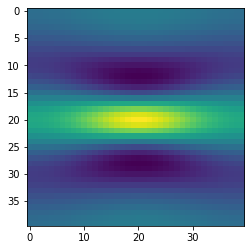

In [16]:
plt.imshow(retina.retina_dico[i_max][0][0].reshape((shape_max, shape_max)))

In [17]:
plt.imshow(retina.retina_dico[23][2][0].reshape((shape_23, shape_23)))

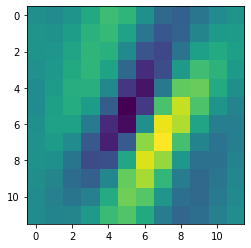

In [18]:
plt.imshow(retina.retina_dico[23][2][1].reshape((shape_23, shape_23)))

In [19]:
from PIL import Image
impath = 'data/i05june05_static_street_boston_p1010808.jpeg'
im = Image.open(impath)

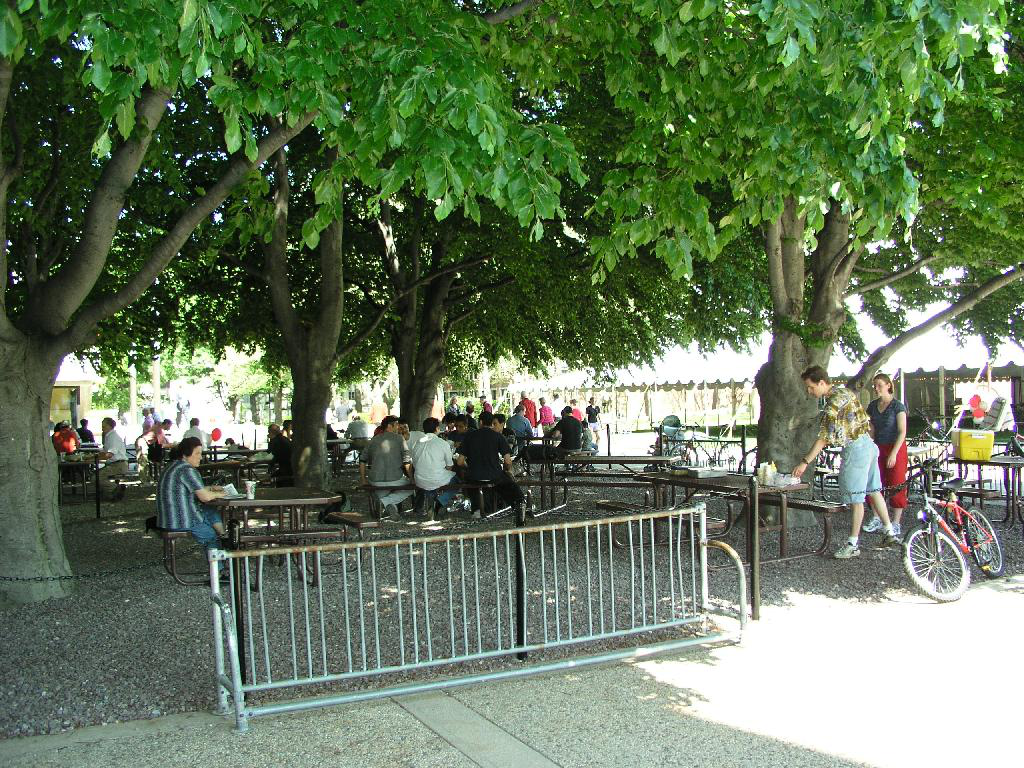

In [20]:
im

In [21]:
im_color_npy = np.asarray(im)
im_color_npy

array([[[ 17,  60,  17],
        [ 22,  63,  21],
        [ 27,  66,  22],
        ...,
        [ 46,  49,  38],
        [ 35,  36,  28],
        [ 30,  29,  24]],

       [[ 16,  59,  16],
        [ 19,  62,  17],
        [ 21,  62,  18],
        ...,
        [ 57,  64,  48],
        [ 38,  41,  30],
        [ 35,  38,  27]],

       [[ 17,  64,  18],
        [ 18,  64,  17],
        [ 18,  61,  15],
        ...,
        [ 51,  63,  39],
        [ 26,  38,  16],
        [ 34,  43,  24]],

       ...,

       [[110, 130, 121],
        [111, 131, 122],
        [102, 122, 113],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[105, 125, 116],
        [101, 121, 112],
        [ 88, 108,  99],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[105, 125, 116],
        [ 98, 118, 109],
        [ 81, 101,  92],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [22]:
im_bw = im.convert("L")

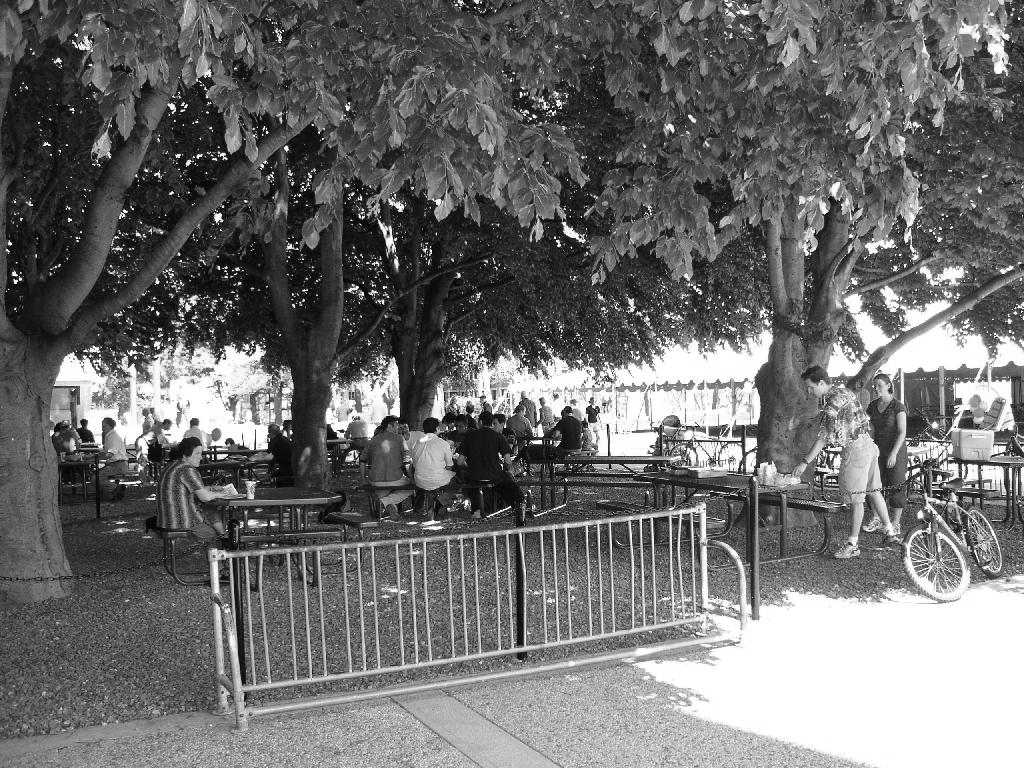

In [23]:
im_bw

In [24]:
im_npy = np.asarray(im_bw)

In [25]:
im_npy

array([[ 42,  46,  49, ...,  47,  35,  29],
       [ 41,  44,  45, ...,  60,  39,  36],
       [ 45,  45,  43, ...,  57,  32,  38],
       ...,
       [123, 124, 115, ..., 255, 255, 255],
       [118, 114, 101, ..., 255, 255, 255],
       [118, 111,  94, ..., 255, 255, 255]], dtype=uint8)

In [26]:
args.N_X, args.N_Y = im_npy.shape
args_N_pic = args.N_Y

# original distribution

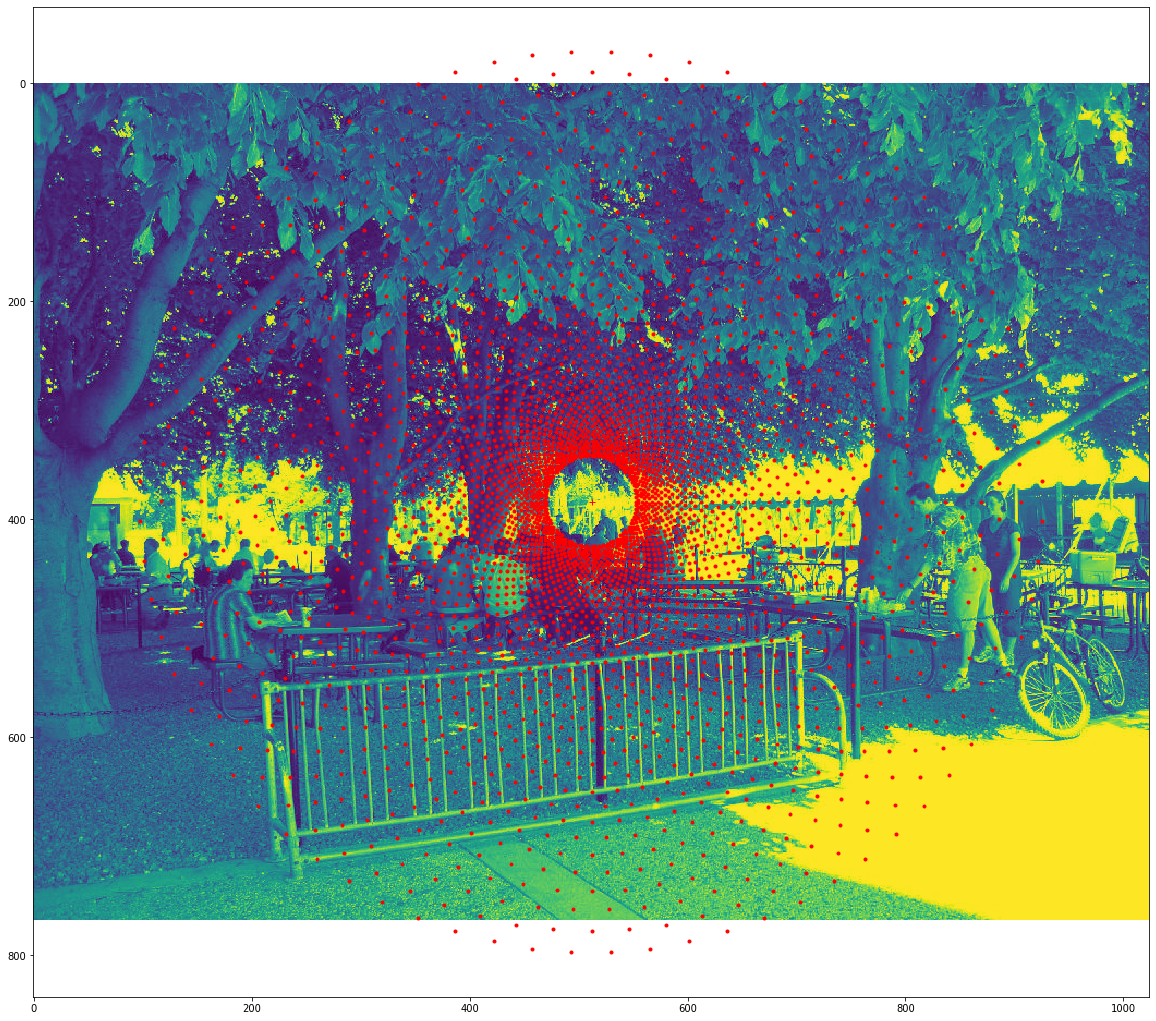

In [27]:
plt.figure(figsize=(20, 20))
plt.imshow(im_bw)

ecc_max = .8
rho = 1.05

N_X, N_Y = args.N_X, args.N_Y
plt.plot(N_Y / 2 ,N_X / 2  , '+r')

for i_eccentricity in range(args.N_eccentricity):
    for i_azimuth in range(args.N_azimuth):

        ecc = ecc_max * (1 / rho) ** ((args.N_eccentricity - i_eccentricity) )

        N_min = min(N_X, N_Y)
        r = np.sqrt(N_min ** 2 + N_min ** 2) / 2 * ecc #- 30  # radius
        # r = np.sqrt(N_X ** 2 + N_Y ** 2) / 2 * ecc - 30 # radius
        psi = (i_azimuth + (i_eccentricity % 2) * .5) * np.pi * 2 / args.N_azimuth
        x = int(N_X / 2 + r * np.cos(psi))
        y = int(N_Y / 2 + r * np.sin(psi))
        plt.plot(y, x  , '.r')


# Dicarlo /retina warp distribution

In [28]:
plt.figure(figsize=(20, 20))
plt.imshow(im_bw)


N_X, N_Y = args.N_X, args.N_Y
plt.plot(N_Y / 2 ,N_X / 2  , '+r')

for i_eccentricity in range(args.N_eccentricity):
    r = retina.r_min + i_eccentricity * (retina.r_max - retina.r_min) / (retina.N_eccentricity - 1)
    r_prim = retina.retina_warp(r)
    ecc = r_prim * 2 / retina.N_pic 
    print(retina.d_retina_warp(r))
    for i_azimuth in range(args.N_azimuth):
        psi = (i_azimuth + (i_eccentricity % 2) * .5) * np.pi * 2 / args.N_azimuth
        x = int(N_X / 2 + r_prim * np.cos(psi))
        y = int(N_Y / 2 + r_prim * np.sin(psi))
        plt.plot(y, x  , '.r')


0.2558427881104495
0.2686889307187301
0.2821800920165391
0.2963486590886634
0.31122864521038374
0.32685577150025413
0.3432675526727575
0.360503387096693
0.3786046513754931
0.3976147996765204
0.41757946804779544
0.4385465839725801
0.4605664814248154
0.4836920217016162
0.5079787203228964
0.5334848803027613
0.5602717321126008
0.5884035806718798
0.6179479597194953
0.6489757939362866
0.6815615692078905
0.7157835114366792
0.7517237743320392
0.7894686366298008
0.8291087092142703
0.8707391526400818
0.9144599055760567
0.9603759247194749
1.0085974367567017
1.0592402029750303
1.1124257971609686
1.1682818974521
1.2269425928431432
1.2885487050820086
1.3532481267286054
1.4211961761879455
1.4925559705698441
1.5674988172703086
1.6462046252146492
1.7288623367495506
1.815670381220916
1.906837151326336
2.002581503385737
2.1031332827311546
2.208733875476892
2.3196367879946664
2.4361082554848075
2.5584278811044956


In [29]:
whiten_transform = RetinaWhiten(args)
im_whiten = whiten_transform(im_npy)

In [30]:
retina.r_max

384.0

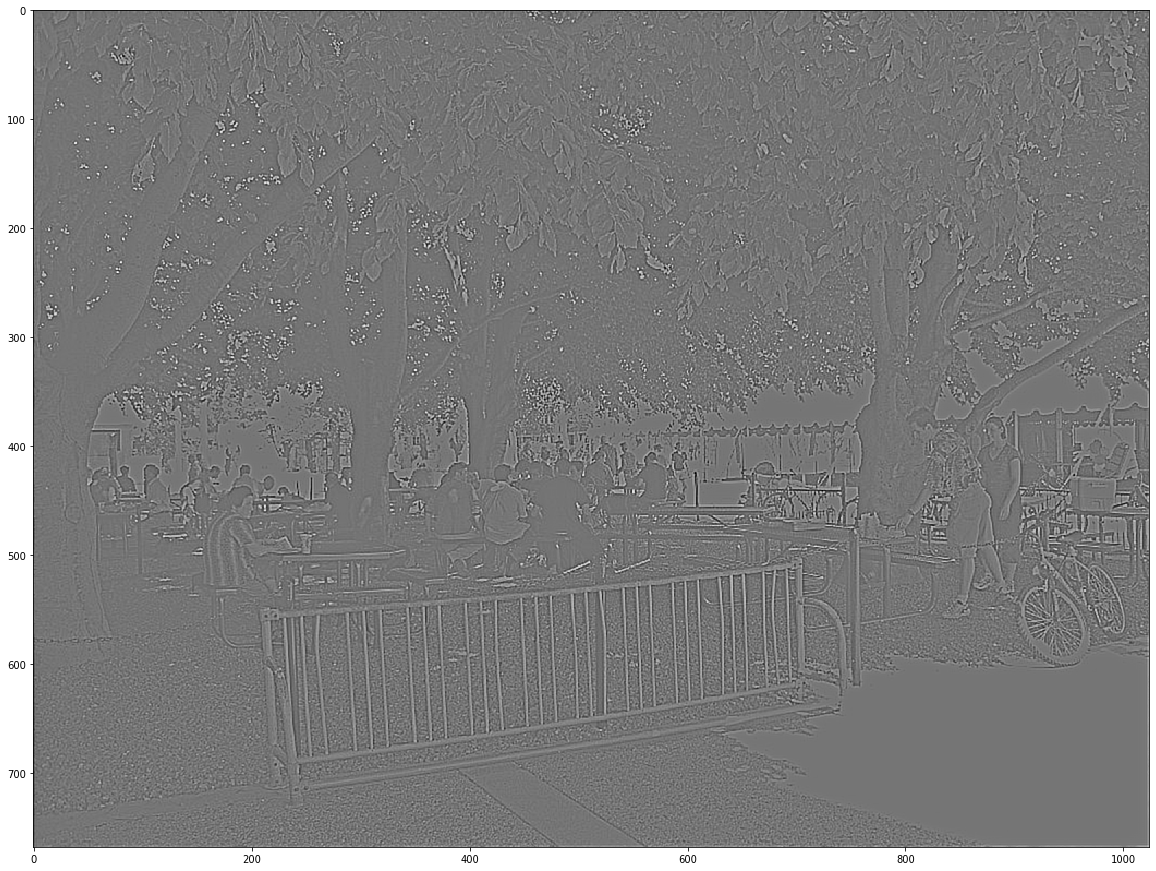

In [31]:
plt.figure(figsize=(20,20))
plt.imshow(im_whiten, cmap='gray')

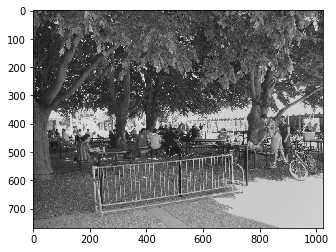

In [32]:
whit = SLIP.Image(pe=pe)
whit.set_size((retina.N_X, retina.N_Y))
img_test = whit.dewhitening(im_whiten)
plt.imshow(img_test, cmap='gray')

In [33]:
retina_features = retina.transform(im_whiten)

TypeError: zeros() takes at most 3 arguments (4 given)

In [ ]:
retina_features.keys()

In [ ]:
#plt.plot(retina_features.as_array())

In [ ]:
img_trans = retina.inverse_transform(retina_features)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img_trans, cmap='gray')

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(im_whiten[args.N_X//2-50:args.N_X//2 + 50, args.N_Y//2-50:args.N_Y//2 + 50], cmap='gray')
plt.subplot(122)
plt.imshow(img_trans[args.N_X//2-50:args.N_X//2 + 50, args.N_Y//2-50:args.N_Y//2 + 50], cmap='gray')

In [ ]:
im_test = img_trans[args.N_X//2-50:args.N_X//2 + 50, args.N_Y//2-50:args.N_Y//2 + 50]
whit.set_size((100, 100))
img_rec = whit.dewhitening(im_test)
plt.imshow(img_rec, cmap='gray')

In [ ]:
from LogGabor import LogGabor

N_theta=6
rho = 1.41
ecc_max = .8  # self.args.ecc_max
sf_0_r = 0.03  # self.args.sf_0_r
sf_0_max = 0.45
B_theta = np.pi / N_theta / 2  # self.args.B_theta
B_sf = .4

pe = {'N_image': 100, 'seed': None, 'N_X': 512, 'N_Y': 512, 'noise': 
0.1, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 
'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N': 
0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 
'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 
1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 
'use_cache': True, 'figpath': 'results', 'edgefigpath': 
'results/edges', 'matpath': 'cache_dir', 'edgematpath': 
'cache_dir/edges', 'datapath': 'database/', 'ext': '.pdf', 'figsize': 
14.0, 'formats': ['pdf', 'png', 'jpg'], 'dpi': 450, 'verbose': 0}


lg = LogGabor(pe=pe)

i_eccentricity = 15
N_eccentricity = 48
ecc = ecc_max * (1 / rho) ** (N_eccentricity - i_eccentricity)

i_theta = 5
N_theta = 6
theta_ref = i_theta * np.pi / N_theta
sf_0 = 0.5 * sf_0_r / ecc
sf_0 = np.min((sf_0, sf_0_max))

N = 200
dimension_filtre = int( N /2 * ecc)
#if dimension_filtre % 2 == 1:
#    dimension_filtre += 1
#dimension_filtre = 100


# print("dimension_filtre", dimension_filtre)
lg.set_size((dimension_filtre, dimension_filtre))

i_phase = 1
phase = i_phase * np.pi / 2

x = dimension_filtre // 2

y = dimension_filtre // 2

params = {'sf_0': sf_0,
           'B_sf': B_sf,
           'theta': theta_ref,
           'B_theta': B_theta}

filter = lg.normalize(lg.invert(lg.loggabor(x, y, **params) * np.exp(-1j * phase)))

In [ ]:
plt.imshow(filter)

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.21) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.08) ** (N_eccentricity - np.arange(N_eccentricity)))

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(10)))